In [141]:
from typing import Tuple, Any

import numpy as np
np.random.seed(0)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [143]:
from matplotlib.colors import ListedColormap
cmap_backgrounds = ListedColormap(
    colors=["#FFAAAA", "#AAAAFF", "#AAFFAA"]
)
cmap_points = ["red", "blue", "green"]

In [144]:
def mesh_grid(x0: np.ndarray, x1: np.ndarray) -> Tuple[Any, Any]:
    margin = 2
    step = 0.25
    x0_axis = np.arange(np.min(x0)-margin, np.max(x0)+margin, step=step)
    x1_axis = np.arange(np.min(x1)-margin, np.max(x1)+margin, step=step)
    xx0, xx1 = np.meshgrid(x0_axis, x1_axis)
    return xx0, xx1

In [145]:
from matplotlib import pyplot as plt

def plot_contours(axes: plt.Axes, clf: KNeighborsClassifier, xx0: np.ndarray, xx1: np.ndarray, **params: Any):
    data = np.vstack((xx0.flatten(), xx1.flatten())).transpose()
    y_pred =  clf.predict(data)
    y_pred = np.reshape(y_pred, newshape=xx0.shape)
    axes.contourf(np.reshape(data[:, 0], newshape=xx0.shape), np.reshape(data[:, 1], newshape=xx1.shape), y_pred, **params)

In [146]:
def plot_decision_border(clf: KNeighborsClassifier, x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray) -> None:
    _, ax = plt.subplots()
    x0 = x_train[:, 0]
    x1 = x_train[:, 1]
    xx0, xx1 = mesh_grid(x0, x1)
    plot_contours(ax, clf, xx0, xx1,
        cmap=cmap_backgrounds,
        #levels=range(len(cmap_backgrounds.colors)),
        alpha=0.5
    )
    for idx, point in enumerate(x_train):
        plt.scatter(
            x=point[0],
            y=point[1],
            s=15, marker="o",
            color=cmap_points[y_train[idx]]
        )

    for idx, point in enumerate(x_test):
        plt.scatter(
            x=point[0],
            y=point[1],
            s=40, marker="*",
            color=cmap_points[y_test[idx]]
        )
    plt.xlim([7.5, 25.0])
    plt.ylim([10.0, 35.0])
    plt.show()

#### Loading Dataset

In [147]:
dataset = load_breast_cancer()
x = dataset.data[:, :2]
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Testing Hyper-parameters with K-Neighbors Classifier

1-Neighbors: Train Score = 100.0%, Test Score = 81.87%


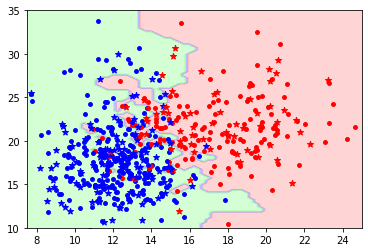

3-Neighbors: Train Score = 93.22%, Test Score = 84.21%


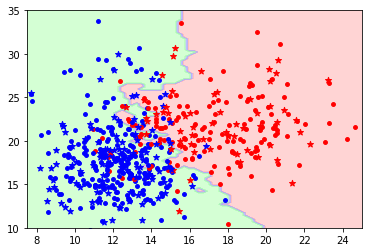

5-Neighbors: Train Score = 92.46%, Test Score = 87.72%


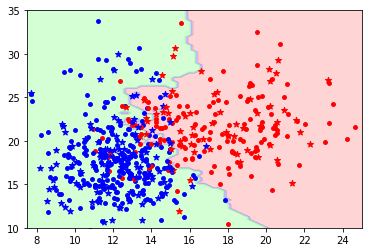

7-Neighbors: Train Score = 91.46%, Test Score = 88.89%


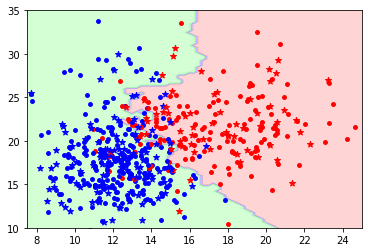

9-Neighbors: Train Score = 90.2%, Test Score = 90.64%


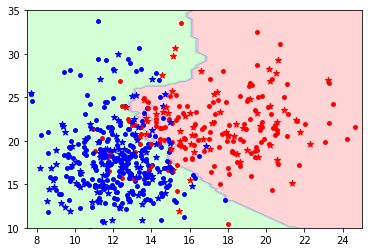

19-Neighbors: Train Score = 90.45%, Test Score = 90.64%


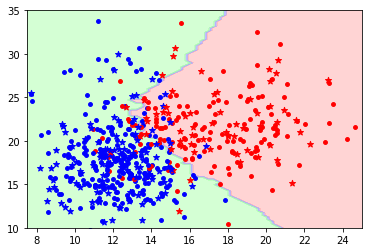

29-Neighbors: Train Score = 89.45%, Test Score = 92.4%


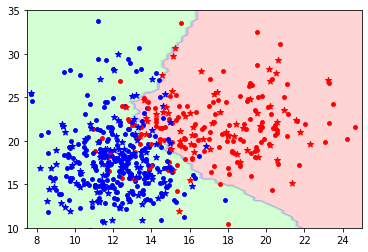

49-Neighbors: Train Score = 90.2%, Test Score = 91.81%


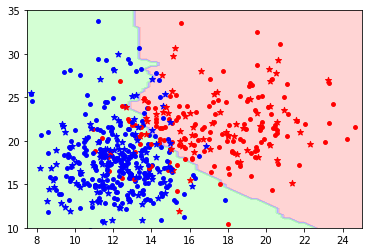

59-Neighbors: Train Score = 89.7%, Test Score = 91.23%


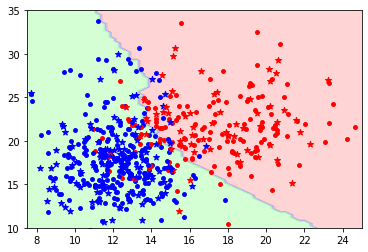

79-Neighbors: Train Score = 88.44%, Test Score = 90.64%


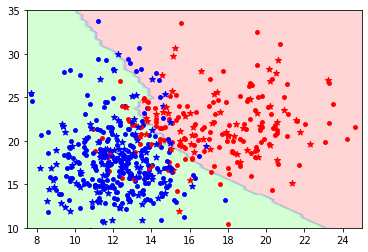

99-Neighbors: Train Score = 88.19%, Test Score = 90.64%


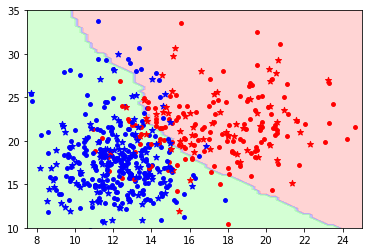

In [148]:
ks = [1, 3, 5, 7, 9, 19, 29, 49, 59, 79, 99]
train_size = 600
test_size = 300

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)

    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    print(f"{k}-Neighbors: Train Score = {train_score*100:.4}%, Test Score = {test_score*100:.4}%")
    plot_decision_border(clf, x_train[:train_size], y_train[:train_size], x_test[:test_size], y_test[:test_size])